# Lecture 09: A quick tour of SciPy
2019-06-18

Course material is available at http://unihb.eu/pdap2019

## References

- https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html
- https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
- https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

## Transcript

1. Linear algebra
2. Interpolation
3. Ordinary differential equations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

## Linear algebra

In [2]:
from scipy import linalg

### Scalar / dot product

What is 

$$ \left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right] \cdot \left[\begin{array}{c} 2\\ -1\\ 3\end{array}\right] = ?$$

In [3]:
mat = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
vec = np.array([2, -1, 3])

In [4]:
mat

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [5]:
mat.dot(vec)

array([14,  2, 25])

In [6]:
np.dot(mat, vec)

array([14,  2, 25])

### Inverse of a matrix

$$ \mathbf{A} = \left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right] $$

then

$$ \mathbf{A^{-1}} = \frac{1}{25}
    \left[\begin{array}{ccc} -37 & 9 & 22 \\
                              14 & 2 & -9 \\
                              4 & -3 & 1
          \end{array}\right] = %
     \left[\begin{array}{ccc} -1.48 & 0.36 & 0.88  \\
                               0.56 & 0.08 & -0.36 \\
                               0.16 & -0.12 & 0.04
           \end{array}\right] $$

In [7]:
from scipy import linalg

In [8]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])

In [9]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [10]:
np.dot(A, linalg.inv(A))

array([[ 1.00000000e+00, -1.11022302e-16,  4.85722573e-17],
       [ 3.05311332e-16,  1.00000000e+00,  7.63278329e-17],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

In [11]:
np.zeros_like(A)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [12]:
linalg.inv(np.zeros_like(A))

LinAlgError: singular matrix

### Linear systems

$    \begin{eqnarray*} x + 3y + 5z & = & 10 \\
                      2x + 5y + z & = & 8  \\
                      2x + 3y + 8z & = & 3
    \end{eqnarray*}
$

In [13]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
b = np.array([10, 8, 3])

In [14]:
linalg.solve(A, b)

array([-9.28,  5.16,  0.76])

In [15]:
np.dot(A, linalg.solve(A, b))

array([10.,  8.,  3.])

### Determinants

The determinant of

$$\mathbf{A=}\left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right]$$

is

$
    \begin{eqnarray*} \left|\mathbf{A}\right| & = & 1\left|\begin{array}{cc} 5 & 1\\ 3 & 8\end{array}\right|-3\left|\begin{array}{cc} 2 & 1\\ 2 & 8\end{array}\right|+5\left|\begin{array}{cc} 2 & 5\\ 2 & 3\end{array}\right|\\  & = & 1\left(5\cdot8-3\cdot1\right)-3\left(2\cdot8-2\cdot1\right)+5\left(2\cdot3-2\cdot5\right)=-25.\end{eqnarray*}
$

In [16]:
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
linalg.det(A)

-25.000000000000004

### Eigenvalues and eigenvectors

For a square matrix $\mathbf{A}$, the eigenvalues and eigenvectors are scalars $\lambda$ and vectors $\mathbf{v}$ such that

$$ \mathbf{Av}=\lambda\mathbf{v} $$

Now, let

$$ \mathbf{A}=\left[\begin{array}{ccc} 1 & 5 & 2\\ 2 & 4 & 1\\ 3 & 6 & 2\end{array}\right] $$

In [17]:
A = np.array([[1, 5, 2], [2, 4, 1], [3, 6, 2]])

In [18]:
linalg.eig(A)

(array([ 7.9579162 +0.j, -1.25766471+0.j,  0.2997485 +0.j]),
 array([[-0.5297175 , -0.90730751,  0.28380519],
        [-0.44941741,  0.28662547, -0.39012063],
        [-0.71932146,  0.30763439,  0.87593408]]))

In [19]:
lambdas, vs = linalg.eig(A)

In [20]:
lambdas

array([ 7.9579162 +0.j, -1.25766471+0.j,  0.2997485 +0.j])

In [21]:
vs

array([[-0.5297175 , -0.90730751,  0.28380519],
       [-0.44941741,  0.28662547, -0.39012063],
       [-0.71932146,  0.30763439,  0.87593408]])

In [22]:
v1 = vs[:, 0]
v2 = vs[:, 1]
v3 = vs[:, 2]

In [23]:
v1

array([-0.5297175 , -0.44941741, -0.71932146])

In [24]:
np.dot(A, v1)

array([-4.21544748, -3.57642611, -5.72429989])

In [25]:
lambdas[0] * v1

array([-4.21544748+0.j, -3.57642611+0.j, -5.72429989+0.j])

### Linear least squares problems

see https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html#solving-linear-least-squares-problems-and-pseudo-inverses

$$y_i = c_1 e^{-xi} + c_2 x_i$$

In [26]:
c1, c2 = 5.0, 2.0
xi = np.linspace(0, 1, 11)
y_true = c1 * np.exp(-xi) + c2 * xi
y_meas = y_true + .05 * np.max(y_true) * np.random.randn(y_true.size)

In [27]:
A = np.column_stack([np.exp(-xi), xi])
A

array([[1.        , 0.        ],
       [0.90483742, 0.1       ],
       [0.81873075, 0.2       ],
       [0.74081822, 0.3       ],
       [0.67032005, 0.4       ],
       [0.60653066, 0.5       ],
       [0.54881164, 0.6       ],
       [0.4965853 , 0.7       ],
       [0.44932896, 0.8       ],
       [0.40656966, 0.9       ],
       [0.36787944, 1.        ]])

In [28]:
b = y_meas

In [29]:
c, resid, rank, sigma = linalg.lstsq(A, b)
print(c)

[5.03582612 2.14857875]


In [30]:
from scipy.interpolate import interp1d 

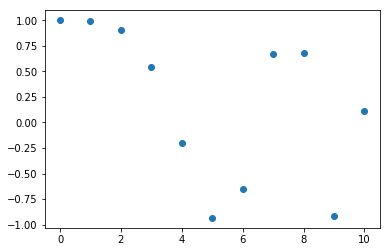

In [31]:
x = np.linspace(0., 10., 11)
y = np.cos(-x**2 / 9.0)
plt.plot(x, y, 'o', label='data');

In [32]:
xnew = np.linspace(0., 10., 41)

In [33]:
f_linear = interp1d(x, y)
f_linear(xnew)

array([ 1.        ,  0.99845838,  0.99691675,  0.99537513,  0.99383351,
        0.97108755,  0.94834159,  0.92559563,  0.90284967,  0.81221283,
        0.72157599,  0.63093915,  0.54030231,  0.35385005,  0.16739779,
       -0.01905446, -0.20550672, -0.38776657, -0.57002643, -0.75228628,
       -0.93454613, -0.86432051, -0.79409488, -0.72386925, -0.65364362,
       -0.32313274,  0.00737814,  0.33788902,  0.6683999 ,  0.67040116,
        0.67240241,  0.67440367,  0.67640492,  0.27952113, -0.11736267,
       -0.51424647, -0.91113026, -0.65452771, -0.39792516, -0.1413226 ,
        0.11527995])

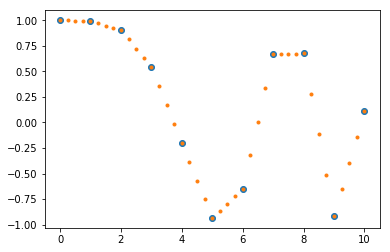

In [34]:
plt.plot(x, y, 'o', label='data');
plt.plot(xnew, f_linear(xnew), '.', label='linear')

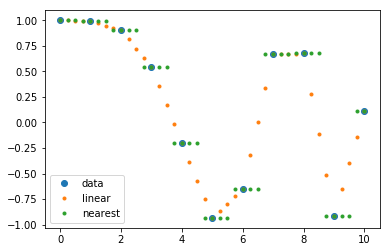

In [35]:
f_nearest = interp1d(x, y, kind='nearest')
plt.plot(x, y, 'o', label='data')
plt.plot(xnew, f_linear(xnew), '.', label='linear')
plt.plot(xnew, f_nearest(xnew), '.', label='nearest')
plt.legend();

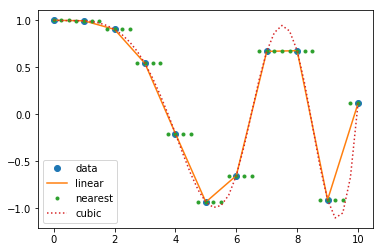

In [36]:
f_cubic = interp1d(x, y, kind='cubic')
plt.plot(x, y, 'o', label='data')
plt.plot(xnew, f_linear(xnew), '-', label='linear')
plt.plot(xnew, f_nearest(xnew), '.', label='nearest')
plt.plot(xnew, f_cubic(xnew), ':', label='cubic')
plt.legend();

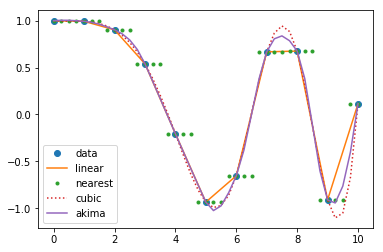

In [37]:
from scipy.interpolate import Akima1DInterpolator
f_akima = Akima1DInterpolator(x, y)
plt.plot(x, y, 'o', label='data')
plt.plot(xnew, f_linear(xnew), '-', label='linear')
plt.plot(xnew, f_nearest(xnew), '.', label='nearest')
plt.plot(xnew, f_cubic(xnew), ':', label='cubic')
plt.plot(xnew, f_akima(xnew), '-', label='akima')
plt.legend();

In [38]:
from scipy.interpolate import griddata

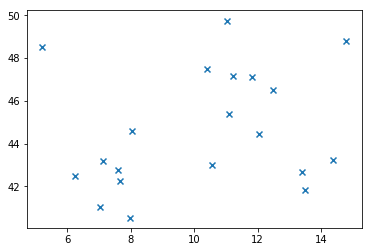

In [39]:
lat = np.random.random_sample(20) * (50 - 40) + 40
lon = np.random.random_sample(20) * (15 - 5) + 5
plt.scatter(lon, lat, marker='x')

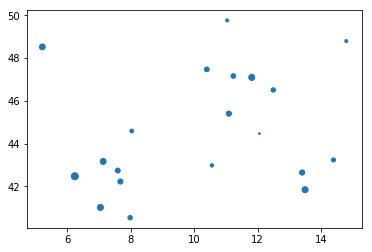

In [40]:
np.random.seed(123)
meas = np.random.random_sample(20)
plt.scatter(lon, lat, s=50*meas)

In [41]:
griddata(np.column_stack([lon, lat]), meas, [10, 42])

array([0.34095304])

In [42]:
xi = np.column_stack([[12.5] * 10, np.linspace(42.5, 46.5, 10)])
xi

array([[12.5       , 42.5       ],
       [12.5       , 42.94444444],
       [12.5       , 43.38888889],
       [12.5       , 43.83333333],
       [12.5       , 44.27777778],
       [12.5       , 44.72222222],
       [12.5       , 45.16666667],
       [12.5       , 45.61111111],
       [12.5       , 46.05555556],
       [12.5       , 46.5       ]])

In [43]:
interpdata = griddata(np.column_stack([lon, lat]), meas, xi)

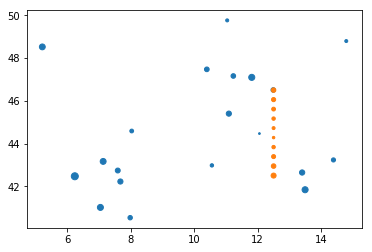

In [44]:
plt.scatter(lon, lat, s=50*meas)
plt.scatter(xi[:, 0], xi[:, 1], s=50*interpdata)

For linear (or nearest-neighbor) N-D interpolation on a regular grid, you can use `interpn`

In [45]:
from scipy.interpolate import interpn

In [46]:
help(interpn)

Help on function interpn in module scipy.interpolate.interpolate:

interpn(points, values, xi, method='linear', bounds_error=True, fill_value=nan)
    Multidimensional interpolation on regular grids.
    
    Parameters
    ----------
    points : tuple of ndarray of float, with shapes (m1, ), ..., (mn, )
        The points defining the regular grid in n dimensions.
    
    values : array_like, shape (m1, ..., mn, ...)
        The data on the regular grid in n dimensions.
    
    xi : ndarray of shape (..., ndim)
        The coordinates to sample the gridded data at
    
    method : str, optional
        The method of interpolation to perform. Supported are "linear" and
        "nearest", and "splinef2d". "splinef2d" is only supported for
        2-dimensional data.
    
    bounds_error : bool, optional
        If True, when interpolated values are requested outside of the
        domain of the input data, a ValueError is raised.
        If False, then `fill_value` is used.
    
  

## ODEs

To demonstrate ODE solving, let's look at a [damped spring-mass oszillator](https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator), which follows the 2nd order ODE

$$ y'' + 2\epsilon\omega_0 y' + \omega_0^2 y = 0$$

with $\omega_0^2 = k/m$, where $k$ is the spring constant and $m$ is the mass.  $\epsilon = \frac{c}{2m\omega_0}$ where $c$ is the damping coefficient.

In [47]:
from scipy.integrate import odeint

$u_1 = y$, $u_2 = y'$

$$u_2' + 2\varepsilon \omega_0 u_2 + \omega_0^2 u_1 = 0$$

$$ u_1' = u_2$$

In [48]:
def derivative(uvec, time, eps, omega):
    return (uvec[1], -2 * eps * omega * uvec[1] - omega**2 * uvec[0])

In [49]:
mass = 0.5  # kg
kspring = 4  # N/m
cdamp = 0.4  # N s/m

eps = cdamp / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

In [50]:
times = np.linspace(0, 10, 101)
uinit = (1, 0)

In [51]:
uarr = odeint(derivative, uinit, times, args=(eps, omega))

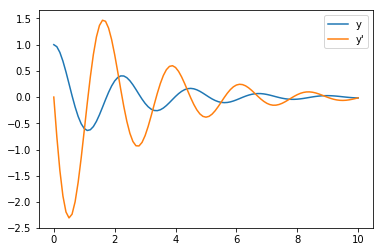

In [52]:
plt.plot(times, uarr[:, 0], label="y")
plt.plot(times, uarr[:, 1], label="y'")
plt.legend();

In [53]:
mass = 0.5  # kg
kspring = 4  # N/m
cdamp = 0.1  # N s/m

eps = cdamp / (2 * mass * np.sqrt(kspring/mass))
omega = np.sqrt(kspring / mass)

In [54]:
times = np.linspace(0, 10, 101)
uinit = (1, 0)

In [55]:
uarr = odeint(derivative, uinit, times, args=(eps, omega))

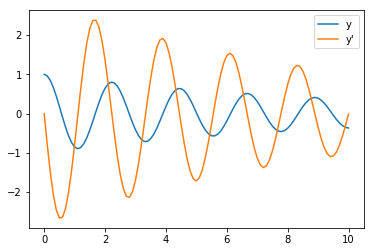

In [56]:
plt.plot(times, uarr[:, 0], label="y")
plt.plot(times, uarr[:, 1], label="y'")
plt.legend();